Não é necessário fazer todas as questões para passar no processo seletivo. Se não conseguir fazer alguma, fique tranquilo, deixamos mais opções para deixar o processo o mais aberto e flexível possível.

# Questão 1
Nesta questão você deve apenas obter algumas métricas de uma matriz, as questões estão em ordem de forma a facilitar seu progresso

a.  Apenas rode o código abaixo(não precisa modificar nada) para obter a base de dados que será usada




In [ ]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas_datareader
!pip install pandas
!pip install datetime
!pip install python-dateutil

import yfinance as yf
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
from dateutil.relativedelta import relativedelta as rltd


tickers = ['ABEV3.SA', 'BBDC4.SA', 'MGLU3.SA','ITSA4.SA', "PETR4.SA", "VALE3.SA",'^BVSP']
today = dt.date.today()
startDate = today - rltd(months = 200)

base = web.get_data_yahoo(tickers, startDate, today)
base = base["Adj Close"]

display(base)

Requirement already up-to-date: yfinance in c:\users\bruno\anaconda3\lib\site-packages (0.1.63)


Symbols,ABEV3.SA,BBDC4.SA,MGLU3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,^BVSP
Date,,,,,,,
2005-01-14,2.823512,NaN,NaN,1.343088,7.204602,11.543864,24924.000000
2005-01-17,2.812959,NaN,NaN,1.331096,7.158666,11.396808,24515.000000
2005-01-18,2.823512,NaN,NaN,1.328097,7.082102,11.499747,24089.000000
2005-01-19,2.781212,NaN,NaN,1.352082,7.124214,11.426221,24271.000000
2005-01-20,2.717765,NaN,NaN,1.319103,6.963431,11.308577,23610.000000
...,...,...,...,...,...,...,...
2021-09-08,16.209999,21.110001,18.790001,10.920000,24.969999,95.040001,113413.000000
2021-09-09,16.309999,21.200001,18.850000,11.140000,25.500000,94.699997,115361.000000
2021-09-10,16.100000,20.940001,17.180000,10.980000,25.340000,94.809998,114286.000000


b. Essa base de dados possui os preços de fechamento das ações da Ambev, Bradesco, Magazine Luiza, Itau, Petrobrás, Vale e do índice Bovespa (uma média ponderada que busca representar a bolsa de valores como um todo).

 Utilzamos normalmente uma biblioteca do Python chamada Pandas, ela nos dá uma série de funções para lidar com bases de dados. Em geral, ele funciona em alguns casos como uma lista de listas e em outros como um dicionário, na maioria das vezes como ambos de forma intercambiável.

 Para um começo de análise queremos que você obtenha o preço médio de no mínimo uma dessas ações (mas sinta-se livre para fazer de todas) durante todo o período disponível. Aqui você poderá tanto utilizar funções do Pandas quanto tentar programar manualmente o cálculo da média.

 Caso queira mais informações sobre o Pandas:https://pandas.pydata.org/docs/


In [ ]:
print(base.mean()[0:6])

Symbols
ABEV3.SA    10.016915
BBDC4.SA    14.601547
MGLU3.SA     4.508590
ITSA4.SA     5.312478
PETR4.SA    16.862379
VALE3.SA    30.250970
dtype: float64


c. Vamos obter mais algumas métricas antes de começar  a mexer nos dados. Selecione uma ou mais ações e obtenha a variância, mediana e moda de cada uma das suas escolhidas.




In [ ]:
print('Variancia das ações: ')
print(base.var()[0:6])
print('\nMediana das ações: ')
print(base.median()[0:6])
print('\nModa das ações (as ações que apresentam mais de uma moda são bimodais ou trimodais): ')
print(base.mode()[0:6])

Variancia das ações: 
Symbols
ABEV3.SA     38.296500
BBDC4.SA     40.760375
MGLU3.SA     52.989557
ITSA4.SA      9.396388
PETR4.SA     35.499307
VALE3.SA    363.183844
dtype: float64

Mediana das ações: 
Symbols
ABEV3.SA    11.972985
BBDC4.SA    12.171640
MGLU3.SA     0.366229
ITSA4.SA     4.043848
PETR4.SA    16.056280
VALE3.SA    25.869511
dtype: float64

Moda das ações (as ações que apresentam mais de uma moda são bimodais ou trimodais): 
Symbols  ABEV3.SA  BBDC4.SA  MGLU3.SA  ITSA4.SA   PETR4.SA   VALE3.SA    ^BVSP
0        1.999427  8.646852  0.212858  2.457812  17.724997  14.087924  45533.0
1        2.728338       NaN       NaN  2.763673        NaN  14.558501  49246.0
2             NaN       NaN       NaN       NaN        NaN        NaN  56097.0


d. Agora, tendo as médias gerais, vamos dar um passo a frente. Queremos calcular a média apenas dos últimos 180 dias. Novamente, faça no mínimo de uma das ações, mas sinta-se livre para fazer das outras.

Após isso, faça o mesmo para 5 e 30 dias e outros períodos que você considere interessante (Detalhe que a base de dados só vai até 200 meses anteriores ao dia atual). Armazene todos os resultados em variáveis com nomes adequados.



In [ ]:
dimensões = base.shape
print('Média das ações nos últimos 180 dias: ')
ultimos_180_dias = base.iloc[dimensões[0]-180:dimensões[0],:]
print(ultimos_180_dias.mean()[0:6])

print('\nMédia das ações nos últimos 5 dias: ')
ultimos_5_dias = base.iloc[dimensões[0]-5:dimensões[0],:]
print(ultimos_5_dias.mean()[0:6])

print('\nMédia das ações nos últimos 30 dias: ')
ultimos_30_dias = base.iloc[dimensões[0]-30:dimensões[0],:]
print(ultimos_30_dias.mean()[0:6])

print('\nMédia das ações nos últimos 900 dias: ')
ultimos_900_dias = base.iloc[dimensões[0]-900:dimensões[0],:]
print(ultimos_900_dias.mean()[0:6])

Média das ações nos últimos 180 dias: 
Symbols
ABEV3.SA     16.400265
BBDC4.SA     23.664997
MGLU3.SA     21.835880
ITSA4.SA     10.826501
PETR4.SA     24.786088
VALE3.SA    101.143674
dtype: float64

Média das ações nos últimos 5 dias: 
Symbols
ABEV3.SA    16.294000
BBDC4.SA    21.194001
MGLU3.SA    17.828000
ITSA4.SA    11.062000
PETR4.SA    25.610000
VALE3.SA    94.765999
dtype: float64

Média das ações nos últimos 30 dias: 
Symbols
ABEV3.SA     16.832333
BBDC4.SA     22.783346
MGLU3.SA     19.201000
ITSA4.SA     11.309402
PETR4.SA     26.719420
VALE3.SA    102.133333
dtype: float64

Média das ações nos últimos 900 dias: 
Symbols
ABEV3.SA    16.290301
BBDC4.SA    23.601582
MGLU3.SA    12.113871
ITSA4.SA    10.475749
PETR4.SA    21.664760
VALE3.SA    57.041315
dtype: float64


e. O que estamos fazendo até agora é a versão mais simples de uma estratégia chamada Médias Móveis. Entretanto, como podemos utilizar esses dados para efetivamente tomar uma decisão de compra ou venda?

O que iremos fazer é comparar as médias móveis. Se a média de um tempo menor, por exemplo 5 dias, estiver maior que uma média de tempo maior, isto será um sinal de venda, caso contrário será de compra. Escolha no mínimo dois períodos para comparar e gere uma lista de sinais de compra e venda.

In [ ]:
#Periodo 1: Últimos 2 meses para as ações VALE3.SA:
sinais_últimos_2_meses = []
for i in range (59,-1,-1):

    ultimos_5_dias = base.iloc[dimensões[0]-5-i:dimensões[0]-i,5]
    média_menor = float(ultimos_5_dias.mean())

    ultimos_180_dias = base.iloc[dimensões[0]-180-i:dimensões[0]-i,5]
    média_maior = float(ultimos_180_dias.mean())

    if média_menor > média_maior:
        sinais_últimos_2_meses.append('Comprar')
    elif média_menor < média_maior:
        sinais_últimos_2_meses.append('Vender')
    elif média_menor == média_menor:
        sinais_últimos_2_meses.append('Deixar')

print(sinais_últimos_2_meses)

#Periodo 2: Últimos 10 meses para as ações VALE3.SA:

sinais_últimos_10_meses = []
for i in range (299,-1,-1):

    ultimos_5_dias = base.iloc[dimensões[0]-5-i:dimensões[0]-i,5]
    média_menor = float(ultimos_5_dias.mean())

    ultimos_180_dias = base.iloc[dimensões[0]-180-i:dimensões[0]-i,5]
    média_maior = float(ultimos_180_dias.mean())

    if média_menor > média_maior:
        sinais_últimos_10_meses.append('Comprar')
    elif média_menor < média_maior:
        sinais_últimos_10_meses.append('Vender')
    elif média_menor == média_menor:
        sinais_últimos_10_meses.append('Deixar')

print(sinais_últimos_10_meses)


['Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender', 'Vender']
['Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', 'Comprar', '

f. Apenas os sinais não dizem muita coisa, então crie uma função que receba esses sinais de compra e venda e computa efetivamente o retorno dessa carteira comprando e vendendo as ações de acordo com os sinais. Ressaltamos que o retorno de sua estratégia não será um critério que avaliaremos no processo seletivo.

Caso tenha escolhido mais de uma ação ou mais de um conjunto de sinais de peso 1/n para cada sinal de cada ação sendo n = número de conjunto de perídos * número de ações

Considere apenas o preço de compra e venda das ações, desconsiderando quaisquer ganhos advindos de dividendos ou outras fontes.


In [ ]:
def carteira(ações_iniciais,sinais):
    '''
    (int,list) -> (float, int, float, float)
    Recebe um número inteiro referente à quantidade iniciais de ações e uma lista de sinais de compra e venda e retorna
    o a quantidade de dinheiro ganho, a quantidade de ações obtidas ao final do processo, o valor destas ações, o lucro total e
    o lucro relativo obtido (caso fosse utilizado o método de médias moveis).
    '''
    valores = base.iloc[dimensões[0]-len(sinais):dimensões[0],5]
    ações = ações_iniciais
    lucro = 0
    dia = 0
    for i in sinais:
        movimentação = int(ações/(len(sinais)))
        if i == 'Comprar':
            ações += movimentação
            lucro -= valores[dia] * movimentação
        elif i == 'Vender':
            ações -= movimentação
            lucro += valores[dia] * movimentação
        dia += 1

    lucro_direto = lucro
    ações_finais = ações
    valor_ações = ações*valores[len(sinais)-1]
    lucro_real = lucro_direto + ((valor_ações)-(ações_iniciais*valores[0]))
    lucro_relativo = ((lucro_real + (ações_iniciais*valores[0]))/(ações_iniciais*valores[0]))
    return lucro_direto,ações_finais,valor_ações,lucro_real,lucro_relativo

resultado_10_meses = carteira(1000,sinais_últimos_10_meses)

print('''Exemplo: Caso fosse aplicado o método das médias moveis nos últimos 10 meses para as ações VALE3.SA, iniciando com 1000 ações e
comprando/vendendo 1/(300) do total de ações no momento a cada sinal de compra ou venda, teria-se o seguinte resultado: ''')
print(f'A quantidade de dinheiro ganho diretamente seria aproximadamente {int(resultado_10_meses[0])}.00 reais')
print(f'Ao final, teria-se um total de {resultado_10_meses[1]} ações, estas valendo aproximadamente {int(resultado_10_meses[2])}.00 reais')
print(f'Considerando-se o valor das ações ao final, o lucro obtido no período seria de aproximadamente {int(resultado_10_meses[3])}.00 reais (aproximadamente {int(resultado_10_meses[4]*100)}% de lucro)')
print()
print('Esta função pode ser utilizada fornecendo qualquer lista de sinais (referente a um período) e um número de ações iniciais.')

Exemplo: Caso fosse aplicado o método das médias moveis nos últimos 10 meses para as ações VALE3.SA, iniciando com 1000 ações e 
comprando/vendendo 1/(300) do total de ações no momento a cada sinal de compra ou venda, teria-se o seguinte resultado: 
A quantidade de dinheiro ganho diretamente seria aproximadamente -108994.00 reais
Ao final, teria-se um total de 2227 ações, estas valendo aproximadamente 210496.00 reais
Considerando-se o valor das ações ao final, o lucro obtido no período seria de aproximadamente 51395.00 reais (aproximadamente 202% de lucro)

Esta função pode ser utilizada fornecendo qualquer lista de sinais (referente a um período) e um número de ações iniciais.


g. Parte importante é testar se a estratégia funciona. Faça uma função que compara os retornos da sua estratégia de médias móveis com retornos do Índice Bovespa, que está na lista de ativos da matriz obtida no item (a).

In [ ]:
print('''Para saber se a estratégia funciona, o lucro relativo obtido por ela (capital final/capital inicial) deve ser o
igual ou maior que a valorização do índice Bovespa no periodo investigado. Assim, tem-se a seguinte função: ''')

def comparação(lucro_relativo,periodo):
    '''
    (float,int) -> (bool)
    Recebe o lucro relativo obtido pelo método de médias moveis e o número de dias (da data mais recente para trás) em que
    foi aplicado o método, e retorna True caso a estratégia tenha sido eficiente e False caso contrário.
    '''
    Bovespa = base.iloc[dimensões[0]-periodo:dimensões[0],6]
    if lucro_relativo >= (Bovespa[periodo-1]/Bovespa[0]):
        return True
    else:
        return False

print('Exemplo: Verificando se o exemplo da questão f foi eficiente: ')
print(comparação(resultado_10_meses[4],300))

Para saber se a estratégia funciona, o lucro relativo obtido por ela (capital final/capital inicial) deve ser o
igual ou maior que a valorização do índice Bovespa no periodo investigado. Assim, tem-se a seguinte função: 
Exemplo: Verificando se o exemplo da questão f foi eficiente: 
True


h. Vamos fazer alguns gráficos para visualizar melhor. Utilizando a biblioteca matplotlib crie alguns gráficos que comparem a trajetória da sua seleção de ações com a trajetória de retorno do Índice Bovespa.

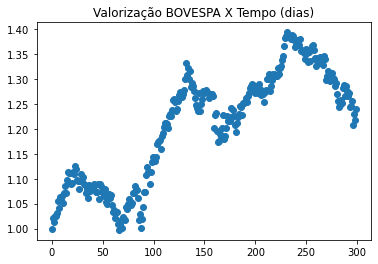

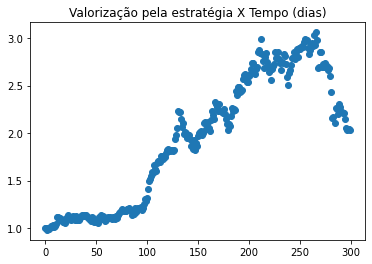

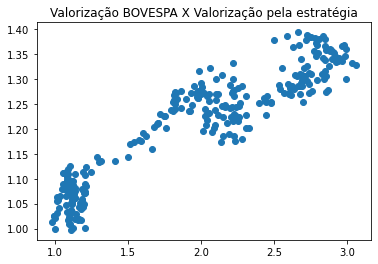

* O último gráfico não faz uma comparação por tempo.


In [ ]:
#Comparação do lucro Relativo obtido caso fosse aplicada a estratégia para as ações VALE3.SA em relação com se fosse aplicada com retorno igual ao do índice bovespa nos últimos 10 meses:
import matplotlib.pyplot as plt

VALE = base.iloc[dimensões[0]-301:dimensões[0],5]
BOVESPA = base.iloc[dimensões[0]-301:dimensões[0],6]
dias = []
for i in range (300):
    dias.append(i)

valorização_VALE = []
ações = 1000
sinais = sinais_últimos_10_meses
lucro = 0
valor_inicial = 1000 * VALE[0]
valor_ações = 1000 * VALE[0]
dia = 0
for i in sinais:
    movimentação = int(ações/(len(sinais)))
    if i == 'Comprar':
        ações += movimentação
        lucro -= VALE[dia] * movimentação
    elif i == 'Vender':
        ações -= movimentação
        lucro += VALE[dia] * movimentação
    dia += 1

    valor_ações = [ações * VALE[dia]]
    valor_total = valor_ações + lucro
    relativo = valor_total/valor_inicial
    valorização_VALE.append(relativo)



valorização_BOVESPA = []
valor_inicial = BOVESPA[0]
for i in range (300):
    valorização = BOVESPA[i]/valor_inicial
    valorização_BOVESPA.append(valorização)

grafico_bovespa = plt.scatter(dias,valorização_BOVESPA)
plt.title('Valorização BOVESPA X Tempo (dias)')
plt.show()


grafico_vale= plt.scatter(dias,valorização_VALE)
plt.title('Valorização pela estratégia X Tempo (dias)')
plt.show()

comparação = plt.scatter(valorização_VALE,valorização_BOVESPA)
plt.title('Valorização BOVESPA X Valorização pela estratégia')
plt.show()

print('* O último gráfico não faz uma comparação por tempo.')

i.  Sabemos que não é apenas o resultado final que importa: o caminho que tomamos para chegar lá também é importante. Assim, vamos verificar quão bom foi o caminho que tomamos para obter nossos resultados com mais algumas métricas.

Crie uma função que obtém o ponto em que a carteira teve o MENOR valor

Crie outra função que obtém o ponto em que  carteira teve seu MAIOR valor

Crie uma última função que obtém a variância que esta carteira teve durante o período de utilização da estratégia

In [ ]:
#Função que retorna o valor da carteira a cada dia no período em questão (investindo-se na VALE):

def valores(ações_iniciais,sinais):
    '''
    (int,list) -> (list)

    Recebe a quantidade de ações iniciais e uma lista de sinais e retorna o valor total da carteira a cada dia
    '''
    dias = len(sinais)
    VALE = base.iloc[dimensões[0]-dias-1:dimensões[0],5]

    lucro = 0
    valor_inicial = 1000 * VALE[0]
    valor_ações = 1000 * VALE[0]
    valores = [valor_inicial]
    ações = ações_iniciais
    dia = 0
    for i in sinais:
        movimentação = int(ações/(len(sinais)))
        if i == 'Comprar':
            ações += movimentação
            lucro -= VALE[dia] * movimentação
        elif i == 'Vender':
            ações -= movimentação
            lucro += VALE[dia] * movimentação
        dia += 1

        valor_ações = [ações * VALE[dia]]
        valor_total = float(valor_ações + lucro)
        valores.append(valor_total)
    return valores

def menor_valor(ações_iniciais,sinais):
    minimo = min(valores(ações_iniciais,sinais))
    return minimo

def maior_valor(ações_iniciais,sinais):
    maximo = max(valores(ações_iniciais,sinais))
    return maximo

def variancia_periodo(ações_iniciais,sinais):
    lista = valores(ações_iniciais,sinais)
    soma = 0
    for i in lista:
        soma += float(i)
    media = soma/(len(lista))

    diferença_quadrada = 0
    for i in lista:
        diferença_quadrada += ((i-media)*(i-media))

    variancia = diferença_quadrada/(len(lista))
    return variancia


print('Exemplo:')
print('Para 1000 ações inicíais aplicadas nos últimos 3 meses na VALE:')
print(f'Mínimo aproximado: {int(menor_valor(1000,sinais_últimos_10_meses))}\t Máximo aproximado: {int(maior_valor(1000,sinais_últimos_10_meses))}\t Variancia: {variancia_periodo(1000,sinais_últimos_10_meses)}')


Exemplo:
Para 1000 ações inicíais aplicadas nos últimos 3 meses na VALE:
Mínimo aproximado: 49115	 Máximo aproximado: 153365	 Variancia: 1146355446.858939


# Questão 2

Uma estratégia de momentum tenta explorar uma falha à hipótese de mercados eficientes. Ela sugere que ativos têm inércia nos movimentos de seus preços, isto é, ações que estão subindo tendem a continuar subindo e as cujo preço está caindo tendem a continuar caindo. Dessa forma, seria possível lucrar apenas seguindo as tendências do mercado, comprando quem está subindo e vendendo quem está caindo, desde que haja suficiente rapidez na percepção desses movimentos.

Desenvolva abaixo uma estratégia que crie uma carteira mensal que acompanha os movimentos do mercado utilizando como retorno apenas a mudança do preço das ações, ou seja, desconsidere dividendos.

A carteira deve conter apenas ações do IBOV ou do S&P500 e um mínimo de 10 ativos e um máximo equivalente ao total das ações disponíveis nas cestas desses indíces. Caso tenha feito alguma seleção específica de ações, é sugerido, mas não requerido, que você escreva um pequeno texto justificando a seleção.

O programa deve estar preferencialmente — mas não obrigatoriamente — no formato de classe com suas funções bem nomeadas e comentadas.

Utilize gráficos e outras métricas para demonstrar a eficácia ou ineficácia desse método.


Comparação entre a estratégia de momentum e a estratégia de médias moveis: 


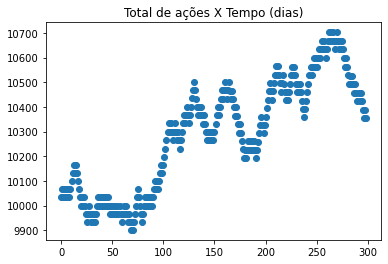

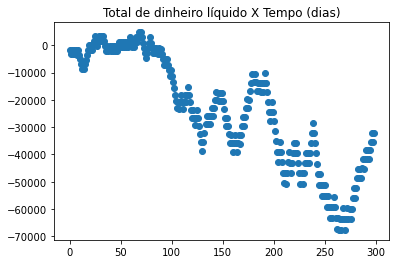

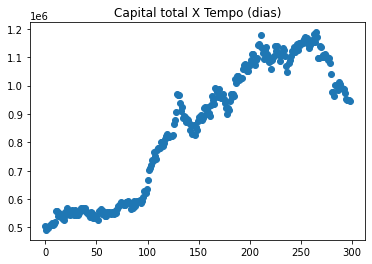

In [ ]:
class Momentum:

    def __init__(self, base_de_dados, ações = 10, dinheiro_inicial = 0, data_inicial = 1, empresa = 1):
        '''
        (Momentum, int, int, int, int) -> (None)

        Função construtora
        Recebe como parametros o próprio objeto da classe Momentum, um inteiro (maior ou igual a 10) que representa
        o número de ações iniciais, a quantidade de dinheiro líquido inicial, um inteiro que representa a data que
        está sendo utilizada (dias a partir de hoje), uma base de dados (em Numpy) com os valores das ações no periodo
        desejado e um número inteiro que representa qual ação será utilizada (com base na própria base de dados)
        '''
        dimensões = base_de_dados.shape

        self.ações = ações
        self.líquido = dinheiro_inicial
        self.base_completa = base_de_dados
        self.data = data_inicial
        self.dados = base_de_dados.iloc[dimensões[0]-self.data-1:dimensões[0]-self.data+1,empresa]
        self.empresa = empresa

        if self.dados[1] >= self.dados[0]:
            self.comprar = True
        else:
            self.comprar = False


    def __str__(self):
        '''
        (self) -> (str)

        Função chamada quando utiliza-se print() com a classe Momentum
        Retorna as possíveis ações em que pode-se investir com base na base de dados fornecida.
        '''
        for i in range (len(self.base_completa.columns)):
            print(f'{i}: {self.base_completa.columns[i]}')
        return('')


    def investir(self, quantidade = 10):
        '''(Momentum, int) -> (None)

        Função mutadora
        Recebe como parametros um objeto da classe Momentum e a quantidade de ações que devem ser compradas ou vendidas.
        Compra ou vende ações baseado no movimento dos preços desta.
        '''

        if self.comprar == True:
            self.ações += quantidade
            self.líquido -= (quantidade * self.dados[1])
        else:
            self.ações -= quantidade
            self.líquido += (quantidade * self.dados[1])

        self.data -= 1
        self.dados = self.base_completa.iloc[dimensões[0]-self.data-1:dimensões[0]-self.data+1,self.empresa]
        if self.dados[1] >= self.dados[0]:
            self.comprar = True
        else:
            self.comprar = False




teste = Momentum(base,10000,0,50,4)

print('Comparação entre a estratégia de momentum e a estratégia de médias moveis: ')

ações = []
dinheiro = []
capital_total = []

carteira = Momentum(base,10000,0,300,5)
carteira.investir(carteira.ações//300)
ações.append(carteira.ações)
dinheiro.append(carteira.líquido)
capital_total.append(carteira.dados[1]*carteira.ações + carteira.líquido)

for i in range (298):
    carteira.investir(carteira.ações//300)
    ações.append(carteira.ações)
    dinheiro.append(carteira.líquido)
    capital_total.append(carteira.dados[1]*carteira.ações + carteira.líquido)

dias = []
for i in range (299):
    dias.append(i)

gráfico_ações = plt.scatter(dias,ações)
plt.title('Total de ações X Tempo (dias)')
plt.show()

gráfico_dinheiro = plt.scatter(dias,dinheiro)
plt.title('Total de dinheiro líquido X Tempo (dias)')
plt.show()

gráfico_capiatl_total = plt.scatter(dias,capital_total)
plt.title('Capital total X Tempo (dias)')
plt.show()
